# CREDIT CARD FRAUD DETECTION

The idea behind this study is to compare the credit card transactions and if there is a difference in impact based on location.

### Literature Review

Credit Card fraud is a critical issue for any banking firm. It has a huge impact on the customer and the banking firm. It has thus become an important factor to employ fraud detection and preventive measures to eliminate such losses.

The issue with the usage of credit card data is that data is highly skewed wherein the amount of non fradulent transaction is higher in comparison to the amount of fradulent transcation.

To tackle the problem of class imbalance, the data is re-sampled using the Synthetic Minority over-sampling Technique.

The Synthetic Minority over-sampling TEchnique (SMOTE)
is amongst of the most dominant techniques that are used to
address the issue of class imbalance that is found in datasets
such as the ones used to build credit card fraud detection ML - based
models [1].

These SMOTE method when coupled with the Adaptive Boosting (AdaBoost) technique increases the classification quality.

As an ensemble method in machine learning, the
AdaBoost algorithm uses the boosting technique known as
Adaptive Boosting. Each instance is given a new set of
weights, with the greater weights going to instances that were
mistakenly categorised. During the data training process, N
decision trees are generated. Priority is given to the record
that was incorrectly classified during the previous model
during the construction of the first decision tree/model Input
for the second model is limited to the records in the first
record.[2]

Machine Learning plays an important role in efficient data processing of financial data. Several research methods employed supervised, unsupervised, hybrid machine learning models to detect the fradulent transactions. As most transactions are legitimate, for high precision prediction may be obtained without properly identifying the fradulent transaction. [3]


Research on fraud detection of credit card fraud transaction based on SMOTE-GAN is widespread and with several effective models developed over the years to tackle the issue. Maram Alamri and Mourad Ykhlef proposed a credit card fraud detection
method based on sampling techniques [4][5].

Their method involves the use of the SMOTE  algorithm to ensure a balanced representation of positive and negative samples in the training
dataset. It depicts the different sampling techniques and methods of implementation. 
The paper also explains more on the imbalance in the data and their impact on the algorithm performance based on inaccuracies, wrong result and F1 values.
Finally, they discuss the significance of sampling techniques in addressing the challenge of imbalanced data in credit card fraud detection .

[1] Ileberi, Emmanuel, Yanxia Sun, and Zenghui Wang. "Performance evaluation of machine learning methods for credit card fraud detection using SMOTE and AdaBoost." IEEE Access 9 (2021): 165286-165294.

[2] Credit Card Fraud Detection using AdaBoost
Algorithm in Comparison with Various Machine
Learning Algorithms to Measure Accuracy,
Sensitivity, Specificity, Precision and F-score 
2022 International Conference on Business Analytics for Technology and Security (ICBATS) | 978-1-6654-0920-9/22/$31.00 ©2022 IEEE | DOI: 10.1109/ICBATS54253.2022.9759022

[3] Trivedi, Naresh Kumar, et al. "An efficient credit card fraud detection model based on machine learning methods." International Journal of Advanced Science and Technology 29.5 (2020): 3414-3424.

[4] Alamri, Maram, and Mourad Ykhlef. "Survey of credit card anomaly and fraud detection using sampling techniques." Electronics 11.23 (2022): 4003.

[5] Du, HaiChao, et al. "A novel method for detecting credit card fraud problems." Plos one 19.3 (2024): e0294537.

## About Data

- The data is taken from Kaggle.
- This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020.
- It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
- https://www.kaggle.com/datasets/kartik2112/fraud-detection/data
- License: https://creativecommons.org/publicdomain/zero/1.0/

#### Data Features

- index - Unique Identifier for each row
- trans_date_trans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag <--- Target Class

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
fraud_train_df = pd.read_csv("~/Documents/GitHub/Independent-Study-Fall-2024/Independent-Study-Fall-2024/data/fraudTrain.csv")
fraud_test_df = pd.read_csv("~/Documents/GitHub/Independent-Study-Fall-2024/Independent-Study-Fall-2024/data/fraudTest.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Null Values in data

In [7]:
print(f"Null Values : \n{fraud_train_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [8]:
print(f"Null Values : \n{fraud_test_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


- There are currently no null values in the training and testing dataset
- Dropping the unnamed 0 column as it is a duplicate of the index column

### Formatting Date to `yy-mm-dd` format

In [9]:
fraud_train_df['trans_date_trans_time']=pd.to_datetime(fraud_train_df['trans_date_trans_time'])
fraud_train_df['trans_date']=fraud_train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_train_df['trans_date']=pd.to_datetime(fraud_train_df['trans_date'])
fraud_train_df['dob']=pd.to_datetime(fraud_train_df['dob'])

fraud_test_df['trans_date_trans_time']=pd.to_datetime(fraud_test_df['trans_date_trans_time'])
fraud_test_df['trans_date']=fraud_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_test_df['trans_date']=pd.to_datetime(fraud_test_df['trans_date'])
fraud_test_df['dob']=pd.to_datetime(fraud_test_df['dob'])
fraud_test_df.trans_date.head(),fraud_test_df.dob.head(),fraud_train_df.trans_date.head(),fraud_train_df.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [10]:
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date'],
      dtype='object')

In [24]:
from datetime import datetime
def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

In [26]:
fraud_train_df['age'] = fraud_train_df['dob'].apply(calculate_age)
fraud_test_df['age'] = fraud_test_df['dob'].apply(calculate_age)

In [28]:
fraud_train_df.sample(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
648905,2019-10-03 15:11:59,372509258176510,fraud_Lynch-Wisozk,home,115.73,Kristen,Hanson,F,26544 Andrea Glen,Goodrich,...,6951,Learning disability nurse,1985-06-18,5c045bd365a41ea45e61801b906ed5a2,1349277119,43.123820,-83.798270,0,2019-10-03,39
823415,2019-12-09 08:21:59,180031190491743,fraud_Kutch Group,grocery_net,53.98,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,...,270712,"Surveyor, land/geomatics",1972-01-05,3c6c9647077bff361130e4405d9c7f91,1355041319,30.016878,-87.409524,0,2019-12-09,52
480421,2019-07-29 12:43:15,342952484382519,"fraud_Hintz, Bauch and Smith",health_fitness,57.54,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,647,Comptroller,1987-09-26,61b61023cda070f78a293e59d00457ec,1343565795,42.518261,-73.371190,0,2019-07-29,37


### Count of Fradulent transaction in training and test dataset

In [11]:
fraud_train_df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [12]:
fraud_test_df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### Conversion of Date of birth and transaction date time to pandas date format

In [13]:
fraud_train_df["dob"] = pd.to_datetime(fraud_train_df["dob"])
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])

fraud_test_df["dob"] = pd.to_datetime(fraud_test_df["dob"])
fraud_test_df['trans_date_trans_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'])

## Exploratory Data Analysis

### Fraud Distribution

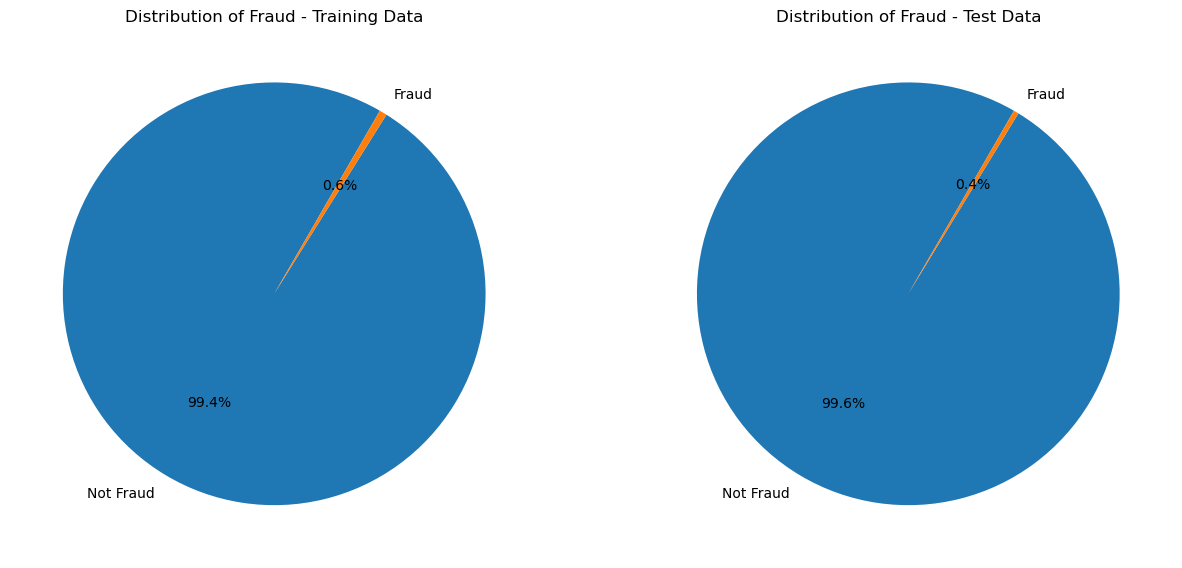

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
labels = ["Not Fraud","Fraud"]
values_train = fraud_train_df.is_fraud.value_counts()
values_test = fraud_test_df.is_fraud.value_counts()

ax1.pie(values_train,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax1.set_title("Distribution of Fraud - Training Data")

ax2.pie(values_test,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax2.set_title("Distribution of Fraud - Test Data")

plt.show()

- We are able to see that the amount of fraud data is `less than 1%` in the total dataset.

### Fraud distribution across job titles

In [15]:
fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

In [16]:
fraud_train_job_title = fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)
fraud_test_job_title = fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts().head(10)

fraud_train_job_title_df = fraud_train_job_title.reset_index()
fraud_train_job_title_df.columns = ['job', 'count']

fraud_test_job_title_df = fraud_test_job_title.reset_index()
fraud_test_job_title_df.columns = ['job', 'count']

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_5259/3883993026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_train_job_title_df, x="count", y="job",palette="viridis")


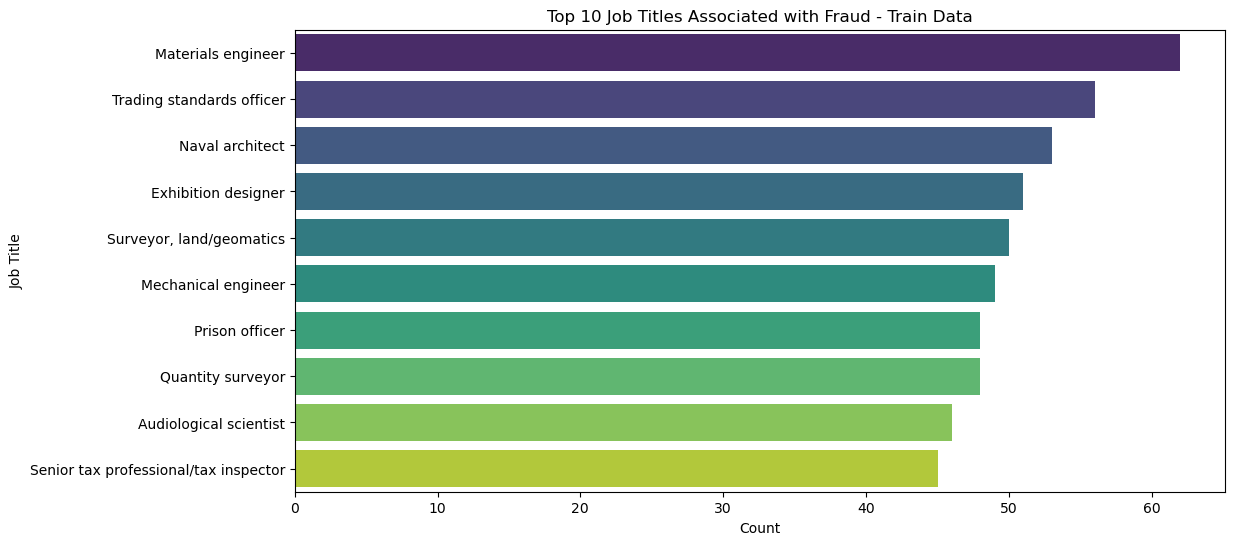

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_train_job_title_df, x="count", y="job",palette="viridis")
plt.title('Top 10 Job Titles Associated with Fraud - Train Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In train dataset, uut of the **443 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Materials engineer` is the job title associated with the highest number of fradulent transactions.

In [18]:
fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts()

job
Science writer                 30
Licensed conveyancer           29
Systems developer              29
Engineer, biomedical           28
Colour technologist            27
                               ..
Video editor                    4
Public relations officer        3
Clinical research associate     3
Commercial horticulturist       3
Pilot, airline                  2
Name: count, Length: 177, dtype: int64

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_5259/2500467427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_test_job_title_df, x="count", y="job",palette="rocket")


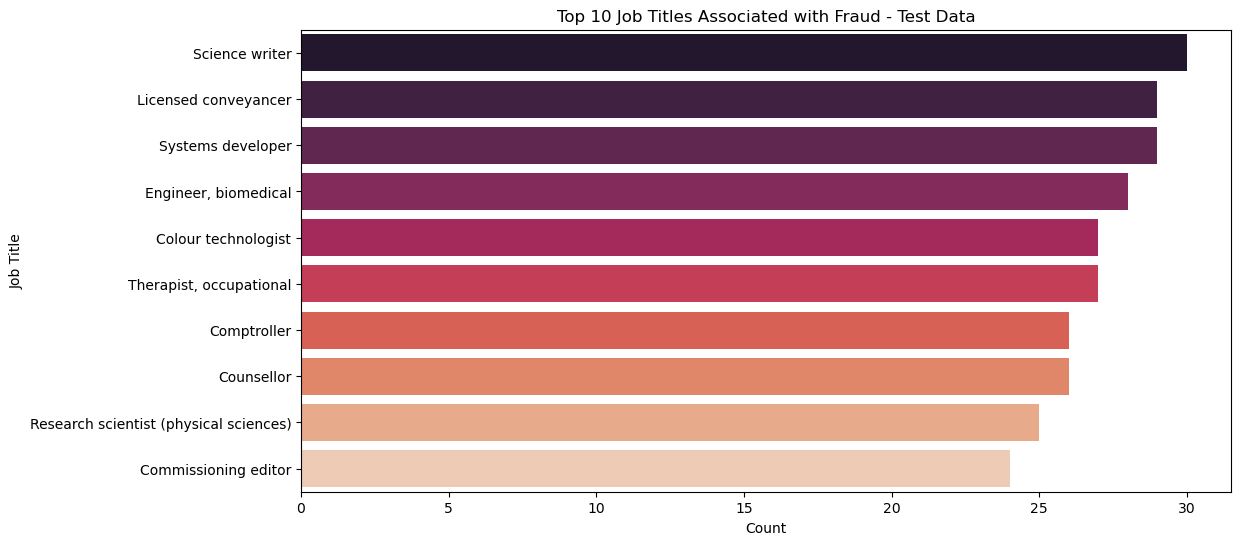

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_test_job_title_df, x="count", y="job",palette="rocket")
plt.title('Top 10 Job Titles Associated with Fraud - Test Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In testing dataset, out of the **177 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Science Writer` is the job title associated with the highest number of fradulent transactions.

### Category vs Fraud

In [20]:
fraud_train_df["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

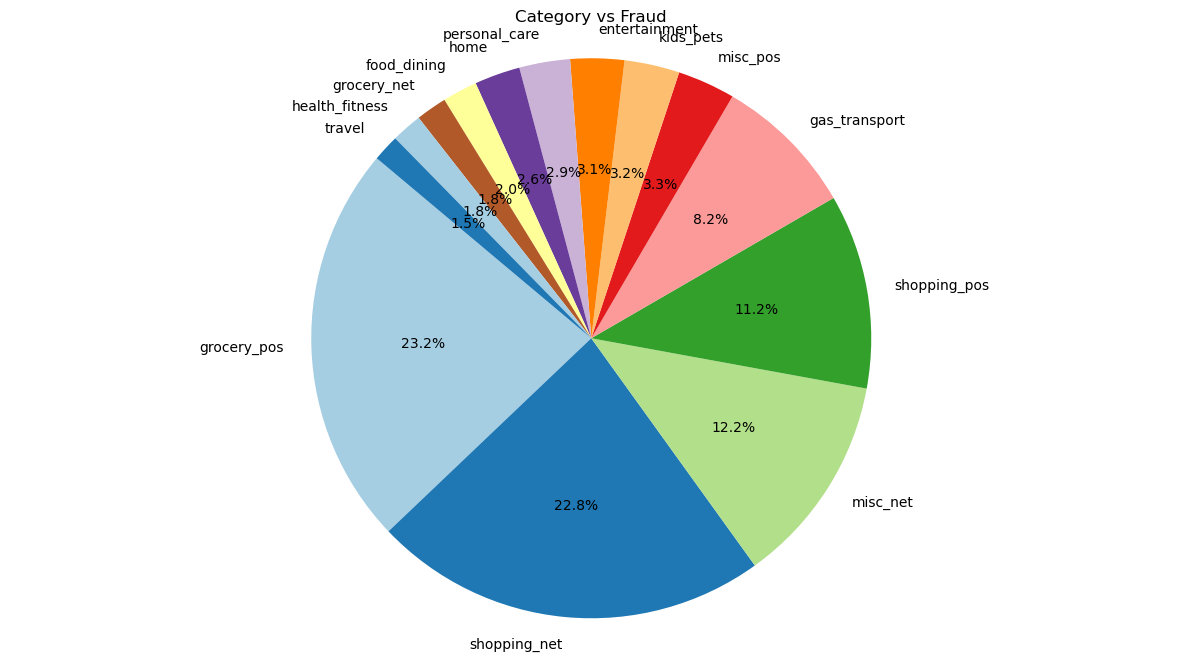

In [21]:
plt.figure(figsize=(15, 8))

fraud_category = fraud_train_df[fraud_train_df["is_fraud"] == 1]["category"].value_counts()

plt.pie(fraud_category, labels=fraud_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", n_colors=len(fraud_category)))
plt.title("Category vs Fraud")
plt.axis('equal')
plt.show()

- Majority of Fradulent transactions fall under the `grocery_pos` and `shopping_net` category covering nearly `46 % of all fradulent transactions`.
- `Travel` is the category least picked under fraud transaction.

### Average of transaction amount

In [22]:
fraud_train_df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

 - `Fraud` Transactions have a average of `531 USD`, whereas `non fraud` transactions have an average `of 68 USD` 

### Gender vs Fraud

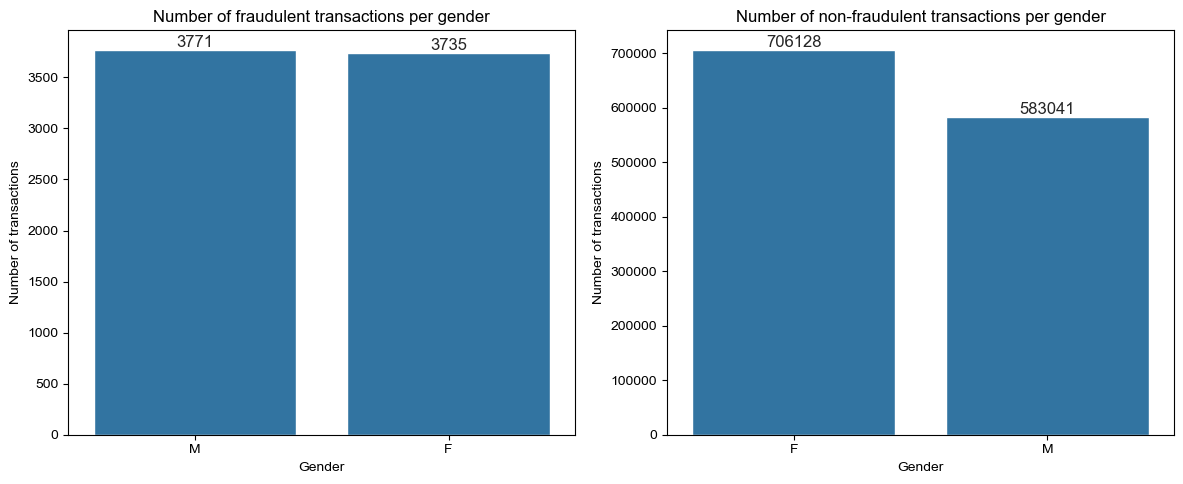

In [23]:
fraud = fraud_train_df[fraud_train_df.is_fraud == 1]
not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0]

# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per gender
g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

- Out of **7506 fraud** transactions, `50.2% are Male and 49.8% are female`.
- Out of **1289169 non fraud** transactions,  `54.8% are Male, 45.2% are female`.
- We notice that there is no significant differences between the number of fraud victims with respect to gender. Women are involved in more transactions than men - 709863 transactions for the former compared to 586812 for the latter. Hence, around 0.64% of transactions involving men are fraudulent compared to 0.53% for women.

### Age Group vs Fraud

In [30]:
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
fraud_train_df["age_group"] = pd.cut(fraud_train_df['age'], bins=bins, labels=labels, right=True)
fraud_test_df["age_group"] = pd.cut(fraud_test_df['age'], bins=bins, labels=labels, right=True)
fraud_train_df.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,age_group
916210,2019-12-30 01:33:24,571365235126,"fraud_Olson, Becker and Koch",gas_transport,52.33,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,...,"Exhibitions officer, museum/gallery",1995-07-12,5f1441c49309903b8f875a0d082c65a3,1356831204,45.491185,-86.020789,0,2019-12-30,29,18-35
713393,2019-11-01 00:27:28,3589289942931264,"fraud_Mosciski, Gislason and Mertz",grocery_pos,92.35,Paula,Estrada,F,350 Stacy Glens,Spencer,...,"Development worker, international aid",1972-03-05,e9e9399c43db3ef038386d5d2900a235,1351729648,42.905841,-98.074361,0,2019-11-01,52,35-60


In [31]:
age_fraud = fraud_train_df[fraud_train_df.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

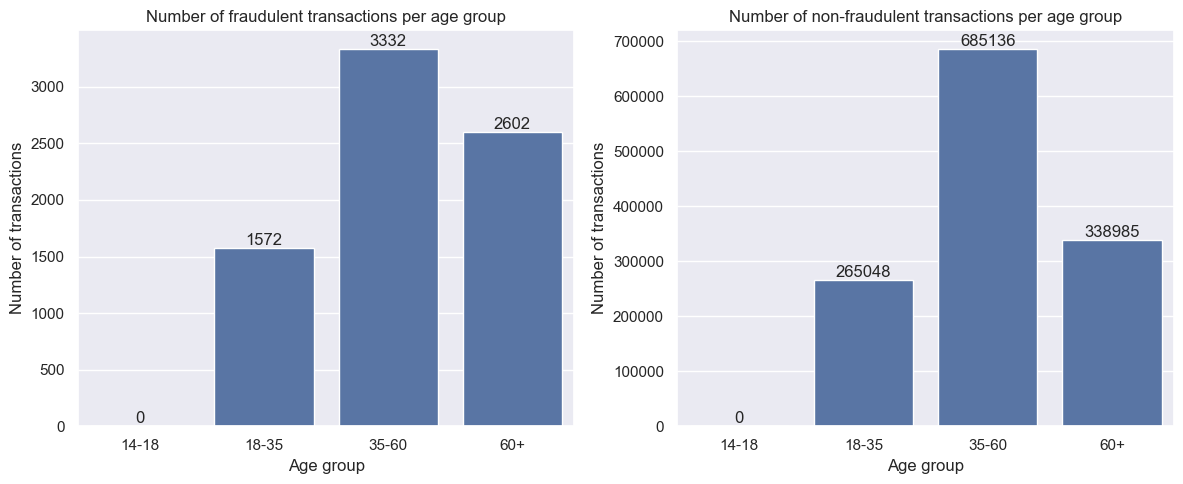

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0])
axes[0].set_title("Number of fraudulent transactions per age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1])
axes[1].set_title("Number of non-fraudulent transactions per age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

- We notice that teenagers are less likely to fall to credit card scams due to less access to credit cards.
- People in middle age groups (`35-60`) are more likely to fall to scams which might be due to more credit card usage.
- However higher percentage of credit scams is observed under `60+` age group, due to less exposure to credit card.